In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = 'C:/Users/Aashima/Downloads/Mutual'
file_name = "MutualFunds.csv"
path = f"{file_path}/{file_name}"

funds = pd.read_csv(path)

In [3]:
funds.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Data type counts:")
print(funds.dtypes.value_counts())

Data type counts:
float64    277
object      21
dtype: int64


In [5]:
print(funds.select_dtypes(include=['object']).columns)

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'fund_category', 'fund_family',
       'exchange_code', 'exchange_name', 'exchange_timezone',
       'management_name', 'management_bio', 'management_start_date',
       'investment_strategy', 'inception_date', 'investment_type', 'size_type',
       'top10_holdings', 'returns_as_of_date', 'esg_peer_group'],
      dtype='object')


In [6]:
numerical_cols = funds.select_dtypes(include=['float64', 'int64']).columns
print(funds[numerical_cols].describe())

       initial_investment  subsequent_investment  total_net_assets  \
count        1.648500e+04            8943.000000      2.374900e+04   
mean         5.179181e+06            1015.925752      4.924192e+09   
std          9.253584e+07           11023.969484      2.109765e+10   
min          1.000000e+01               1.000000      1.000000e+01   
25%          1.000000e+03              50.000000      1.445834e+08   
50%          2.500000e+03              50.000000      6.443283e+08   
75%          5.000000e+05             100.000000      2.453409e+09   
max          5.000000e+09          500000.000000      7.534100e+11   

       year_to_date_return  day50_moving_average  day200_moving_average  \
count         23382.000000          23782.000000           23782.000000   
mean              0.093485             23.638731              23.084989   
std               0.082276             33.126315              31.552946   
min              -0.522800              1.279000               1.3630

In [7]:
miss = funds.isnull().sum()
misscol = miss[miss > 0]
print(misscol)

fund_short_name            824
fund_long_name               5
initial_investment        7298
subsequent_investment    14840
fund_category              663
                         ...  
peer_social_max           8944
governance_score          8395
peer_governance_min       8944
peer_governance_avg       8944
peer_governance_max       8944
Length: 286, dtype: int64


<AxesSubplot:>

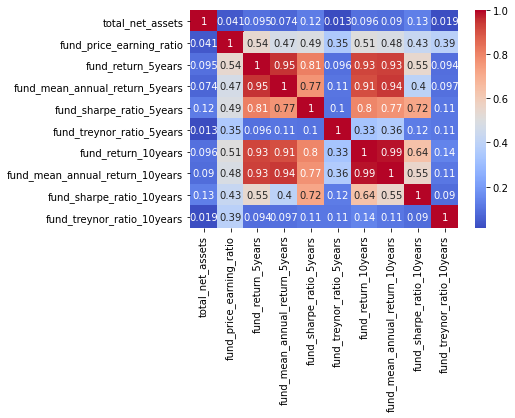

In [8]:
performance_cols = ['total_net_assets', 'fund_price_earning_ratio', 'fund_return_5years', 'fund_mean_annual_return_5years', 'fund_sharpe_ratio_5years', 'fund_treynor_ratio_5years', 'fund_return_10years', 'fund_mean_annual_return_10years', 'fund_sharpe_ratio_10years', 'fund_treynor_ratio_10years']

normalized_df = funds.copy() 
scaler = StandardScaler()
normalized_df[performance_cols] = scaler.fit_transform(funds[performance_cols])

corr_matrix = normalized_df[performance_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [9]:
categorical_cols = ['exchange_name', 'investment_type','size_type', 'fund_category', 'fund_family', ]
performance_cols = ['total_net_assets', 'fund_price_earning_ratio', 'fund_mean_annual_return_5years', 'fund_sharpe_ratio_5years', 'fund_treynor_ratio_5years', 'fund_mean_annual_return_10years', 'fund_sharpe_ratio_10years', 'fund_treynor_ratio_10years']


cate_missing = funds[categorical_cols].isna().sum()
perf_missing = funds[performance_cols].isna().sum()


In [10]:
funds = funds.dropna(subset=categorical_cols + performance_cols, how='all')

categorical_cols_to_dropna = ['investment_type', 'size_type', 'fund_category']
funds = funds.dropna(subset=categorical_cols_to_dropna)

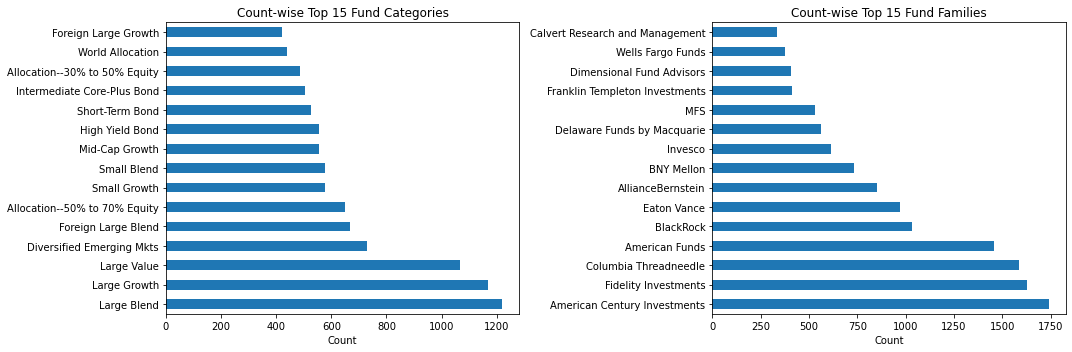

In [11]:
categorical_cols_2 = ['fund_category', 'fund_family'] 
category_counts = funds[categorical_cols_2[0]].value_counts().sort_values(ascending=False)
family_counts = funds[categorical_cols_2[1]].value_counts().sort_values(ascending=False)


top_categories = category_counts[:15]
top_families = family_counts[:15]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
top_categories.plot(kind='barh', ax=axs[0])
axs[0].set_title('Count-wise Top 15 Fund Categories')
axs[0].set_xlabel('Count')
top_families.plot(kind='barh', ax=axs[1])
axs[1].set_title('Count-wise Top 15 Fund Families')
axs[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

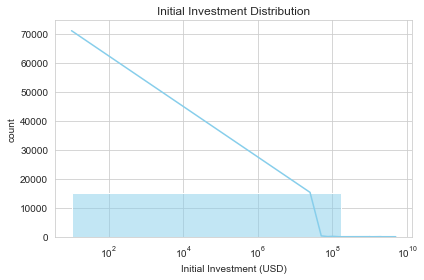

In [12]:
initial_investment_distribution = funds['initial_investment'].dropna()

sns.set_style("whitegrid")
sns.histplot(initial_investment_distribution, bins=30, kde=True, color='skyblue')
plt.title('Initial Investment Distribution')
plt.xlabel('Initial Investment (USD)')
plt.ylabel('count')
plt.xscale('log')

plt.tight_layout()
plt.show()

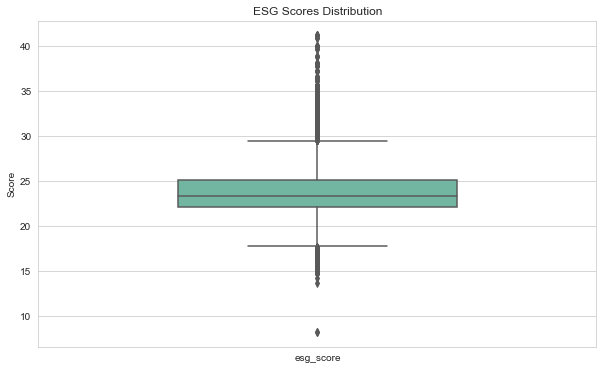

In [13]:
esg_columns = ['esg_score']
esg_data = funds[esg_columns].dropna()  

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=esg_data, width=0.5, palette="Set2")
ax.set_title('ESG Scores Distribution')
ax.set_ylabel('Score')
ax.set_xticklabels(['esg_score'])

plt.show()

In [14]:
performance_cols = ['total_net_assets', 'fund_mean_annual_return_10years', 'fund_sharpe_ratio_10years', 'fund_treynor_ratio_10years', 'fund_price_earning_ratio']
esg_cols = ['environment_score', 'social_score', 'governance_score']
categorical_cols_1 = ['investment_type', 'size_type']

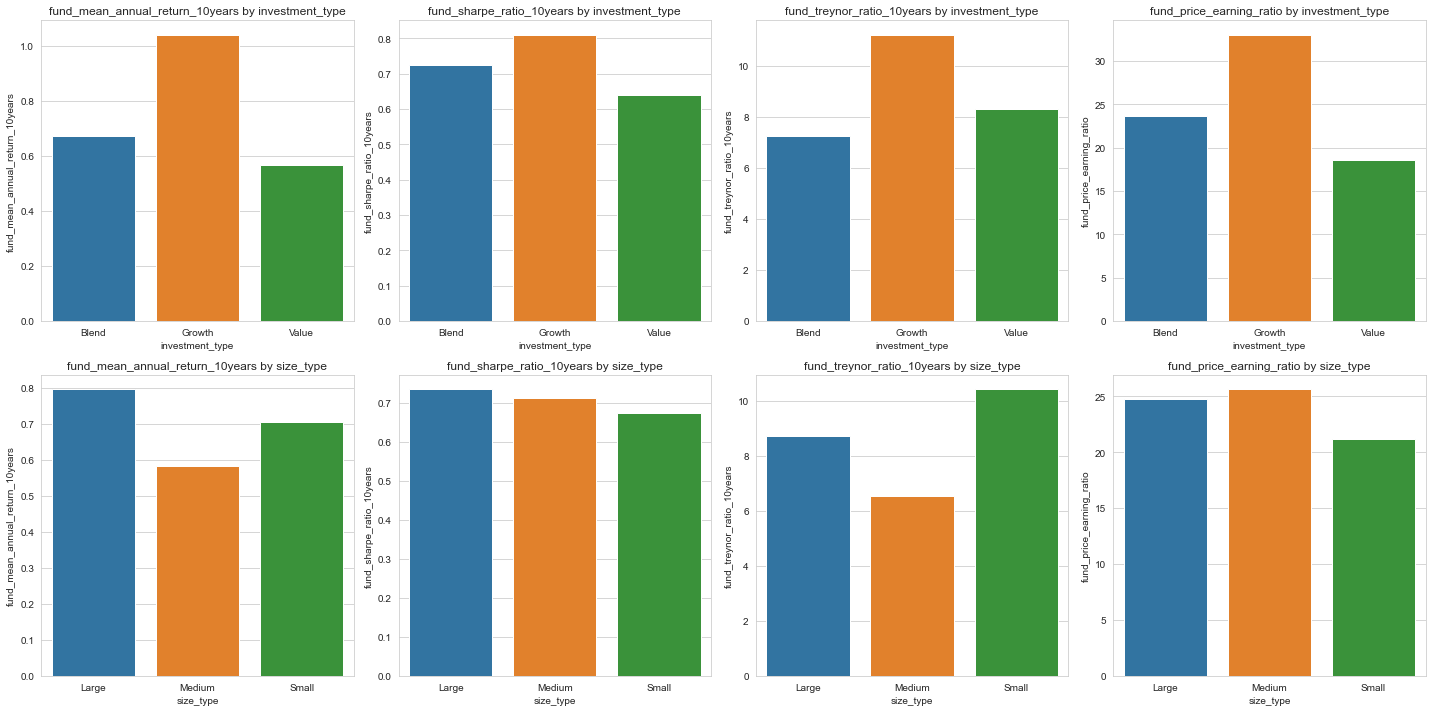

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(performance_cols[1:]):
    for j, cat_col in enumerate(categorical_cols_1):
        data = funds.groupby(cat_col)[col].mean().reset_index() 

        ax = axs[j, i]
        sns.barplot(x=cat_col, y=col, data=data, ax=ax)
        ax.set_title(f'{col} by {cat_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(col)

plt.tight_layout()
plt.show()

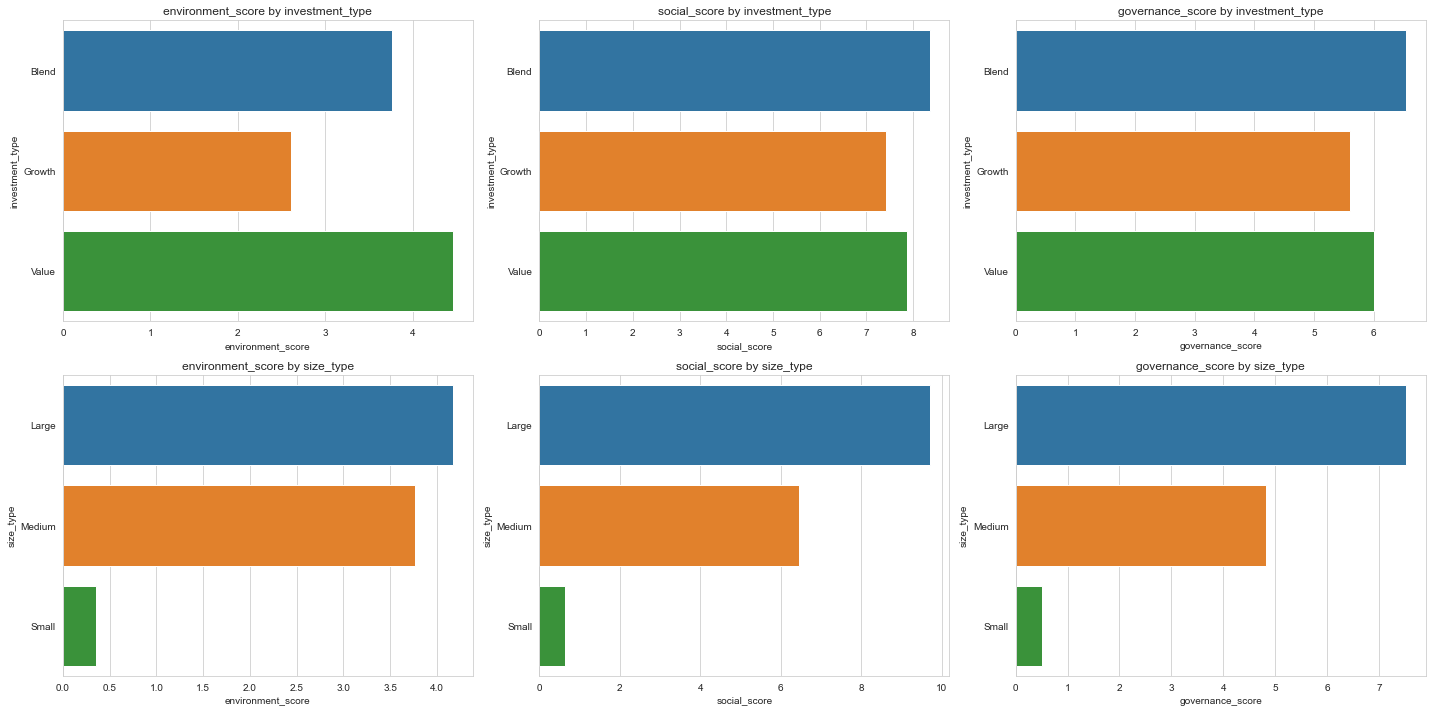

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(esg_cols):
    for j, cat_col in enumerate(categorical_cols_1):
        data = funds.groupby(cat_col)[col].mean().reset_index() 

        ax = axs[j, i]
        sns.barplot(y=cat_col, x=col, data=data, ax=ax)
        ax.set_title(f'{col} by {cat_col}')
        ax.set_xlabel(col)
        ax.set_ylabel(cat_col)

plt.tight_layout()
plt.show()

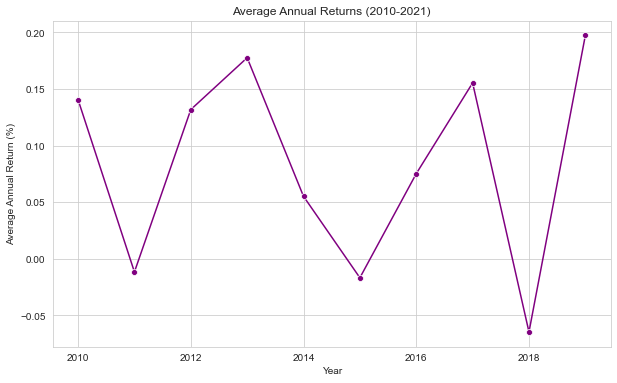

In [17]:
selected_years = [f'fund_return_{year}' for year in range(2010, 2020)]

average_annual_returns = funds[selected_years].mean()

average_annual_returns = average_annual_returns.reset_index()
average_annual_returns.columns = ['Year', 'Average Annual Return']

average_annual_returns['Year'] = average_annual_returns['Year'].str.extract('(\d+)$').astype(int)


plt.figure(figsize=(10, 6))
sns.lineplot(data=average_annual_returns, x='Year', y='Average Annual Return', marker='o', color='purple')
plt.title('Average Annual Returns (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Average Annual Return (%)')
plt.grid(True)
plt.show()